In [527]:
#!pip install pandas
#!pip install fastparquet
#!pip install pyarrow
#!conda install scikit-learn -y
#%pip install matplotlib

In [528]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

In [529]:
#df = pd.read_parquet('daily_weather.parquet')

In [530]:
#df.describe()

In [531]:
#df.dtypes

In [532]:
# df = df[df['date'] > '1999-1-1']

In [533]:
# df = df.reset_index(drop=True)

In [534]:
#df.head()

In [535]:
# dfBP = df[df.city_name == 'Budapest']
# # dfBP = dfBP.drop(columns=['snow_depth_mm'])
# # dfBP = dfBP.drop(columns=['sunshine_total_min'])
# # dfBP = dfBP.drop(columns=['peak_wind_gust_kmh'])
# dfBP = dfBP[['date',  'season', 'avg_temp_c', 'min_temp_c', 'max_temp_c',]]
# dfBP = dfBP.reset_index(drop=True)
# dfBP.head()
# dfBP.to_csv('Budapest.csv', index=False)

In [536]:
dfBP = pd.read_csv('Budapest.csv')
dfBP['date'] = pd.to_datetime(dfBP['date'])
dfBP.head()

,date,season,avg_temp_c,min_temp_c,max_temp_c
0,1999-01-02,Winter,-3.5,-7.0,-0.8
1,1999-01-03,Winter,0.9,-2.9,2.9
2,1999-01-04,Winter,1.8,NaN,7.2
3,1999-01-05,Winter,-0.1,-4.1,2.5
4,1999-01-06,Winter,-0.4,NaN,1.2


In [537]:
dfBP['year'] = dfBP['date'].dt.year
dfBP['month'] = dfBP['date'].dt.month
dfBP['day'] = dfBP['date'].dt.day
dfBPSeasons = pd.factorize(dfBP['season'])[1]
dfBP['season'] = pd.factorize(dfBP['season'])[0]
dfBP = dfBP.drop(columns=['date'])
dfBP.head()

,season,avg_temp_c,min_temp_c,max_temp_c,year,month,day
0,0,-3.5,-7.0,-0.8,1999,1,2
1,0,0.9,-2.9,2.9,1999,1,3
2,0,1.8,NaN,7.2,1999,1,4
3,0,-0.1,-4.1,2.5,1999,1,5
4,0,-0.4,NaN,1.2,1999,1,6


In [538]:
# dfBP['month_sin'] = np.sin(2 * np.pi * dfBP['month'] / 12)
# dfBP['month_cos'] = np.cos(2 * np.pi * dfBP['month'] / 12)
# dfBP['day_sin'] = np.sin(2 * np.pi * dfBP['day'] / 31)
# dfBP['day_cos'] = np.cos(2 * np.pi * dfBP['day'] / 31)
# dfBP['day_of_week'] = pd.to_datetime(dfBP[['year', 'month', 'day']]).dt.dayofweek

In [539]:
# dfBP['prev_day_temp'] = dfBP['avg_temp_c'].shift(1)
# dfBP['week_avg_temp'] = dfBP['avg_temp_c'].rolling(window=7).mean()
# dfBP['temp_anomaly'] = dfBP['avg_temp_c'] - dfBP.groupby(['month', 'day'])['avg_temp_c'].transform('mean')

In [540]:
dfBPWinter = dfBP[dfBP['season'] == 0]
dfBPSpring = dfBP[dfBP['season'] == 1]
dfBPSummer = dfBP[dfBP['season'] == 2]
dfBPAutumn = dfBP[dfBP['season'] == 3]
dfBPSeasons

Index(['Winter', 'Spring', 'Summer', 'Autumn'], dtype='object')

In [541]:
dfBPAutumn.head()

,season,avg_temp_c,min_temp_c,max_temp_c,year,month,day
241,3,17.6,14.1,22.7,1999,9,1
242,3,15.7,10.8,20.2,1999,9,2
243,3,18.6,15.3,23.7,1999,9,3
244,3,16.2,13.4,20.2,1999,9,4
245,3,16.4,11.4,23.4,1999,9,5


In [542]:
valueSummary = pd.DataFrame({"missing_values":dfBP.isnull().sum(), "filled_values":dfBP.count()})
print("Empty and filled values in the dfBP dataset:")
print(valueSummary)

Empty and filled values in the dfBP dataset:
            missing_values  filled_values
season                   0           9006
avg_temp_c               0           9006
min_temp_c             467           8539
max_temp_c             200           8806
year                     0           9006
month                    0           9006
day                      0           9006


In [543]:
#dfBPAutumn.columns[2:5]

In [544]:
dataframes = [dfBPWinter, dfBPSpring, dfBPSummer, dfBPAutumn]

for df in dataframes:
    for i in df.columns:
        df[i] = df[i].fillna(df[i].median())
    valueSummary = pd.DataFrame({"missing_values":df.isnull().sum(), "filled_values":df.count()})
    print("Empty and filled values in the dataset:")
    print(valueSummary)

Empty and filled values in the dataset:
            missing_values  filled_values
season                   0           2221
avg_temp_c               0           2221
min_temp_c               0           2221
max_temp_c               0           2221
year                     0           2221
month                    0           2221
day                      0           2221
Empty and filled values in the dataset:
            missing_values  filled_values
season                   0           2297
avg_temp_c               0           2297
min_temp_c               0           2297
max_temp_c               0           2297
year                     0           2297
month                    0           2297
day                      0           2297
Empty and filled values in the dataset:
            missing_values  filled_values
season                   0           2300
avg_temp_c               0           2300
min_temp_c               0           2300
max_temp_c               0           230

C:\Users\morzs\AppData\Local\Temp\ipykernel_13344\220372134.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = df[i].fillna(df[i].median())
C:\Users\morzs\AppData\Local\Temp\ipykernel_13344\220372134.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = df[i].fillna(df[i].median())
C:\Users\morzs\AppData\Local\Temp\ipykernel_13344\220372134.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [553]:
filledDfBP = pd.concat([dfBPWinter, dfBPSpring, dfBPSummer, dfBPAutumn])
filledDfBP

,season,avg_temp_c,min_temp_c,max_temp_c,year,month,day
0,0,-3.5,-7.0,-0.8,1999,1,2
1,0,0.9,-2.9,2.9,1999,1,3
2,0,1.8,-1.3,7.2,1999,1,4
3,0,-0.1,-4.1,2.5,1999,1,5
4,0,-0.4,-1.3,1.2,1999,1,6
...,...,...,...,...,...,...,...
8728,3,4.7,2.7,6.9,2022,11,30
9002,3,19.8,14.8,25.5,2023,9,1
9003,3,20.6,15.5,25.9,2023,9,2
9004,3,20.3,15.9,24.9,2023,9,3


In [546]:
valueSummary = pd.DataFrame({"missing_values":filledDfBP.isnull().sum(), "filled_values":filledDfBP.count()})
print("Empty and filled values in the filledDfBP dataset:")
print(valueSummary)

Empty and filled values in the filledDfBP dataset:
            missing_values  filled_values
season                   0           9006
avg_temp_c               0           9006
min_temp_c               0           9006
max_temp_c               0           9006
year                     0           9006
month                    0           9006
day                      0           9006


In [547]:
# Amit jósolni akarunk (trager)
y_temp = filledDfBP['avg_temp_c']
y_temp.shape

(9006,)

In [548]:
# Jellemző (Feature)
x_temp = filledDfBP.drop('avg_temp_c', axis=1)
x_temp = x_temp.drop('max_temp_c', axis=1)
x_temp = x_temp.drop('min_temp_c', axis=1)
x_temp.head(2)

,season,year,month,day
0,0,1999,1,2
1,0,1999,1,3


In [549]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(x_temp, y_temp, test_size=0.2, random_state=42)

model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

y_pred_linear = model_linear.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print(f'Mean Squared Error: {mse_linear}')
print(f'R-squared: {r2_linear}')

Mean Squared Error: 55.122568353152175
R-squared: 0.29803906580212247


In [550]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
model_forest = RandomForestRegressor(n_estimators=100, random_state=42)
model_forest.fit(X_train, y_train)

# Evaluate the model
y_pred_Forest = model_forest.predict(X_test)
mse_Forest = mean_squared_error(y_test, y_pred_Forest)
r2_Forest = r2_score(y_test, y_pred_Forest)
print(f'Mean Squared Error: {mse_Forest}')
print(f'R-squared: {r2_Forest}')

Mean Squared Error: 4.852356062708102
R-squared: 0.938207443945334


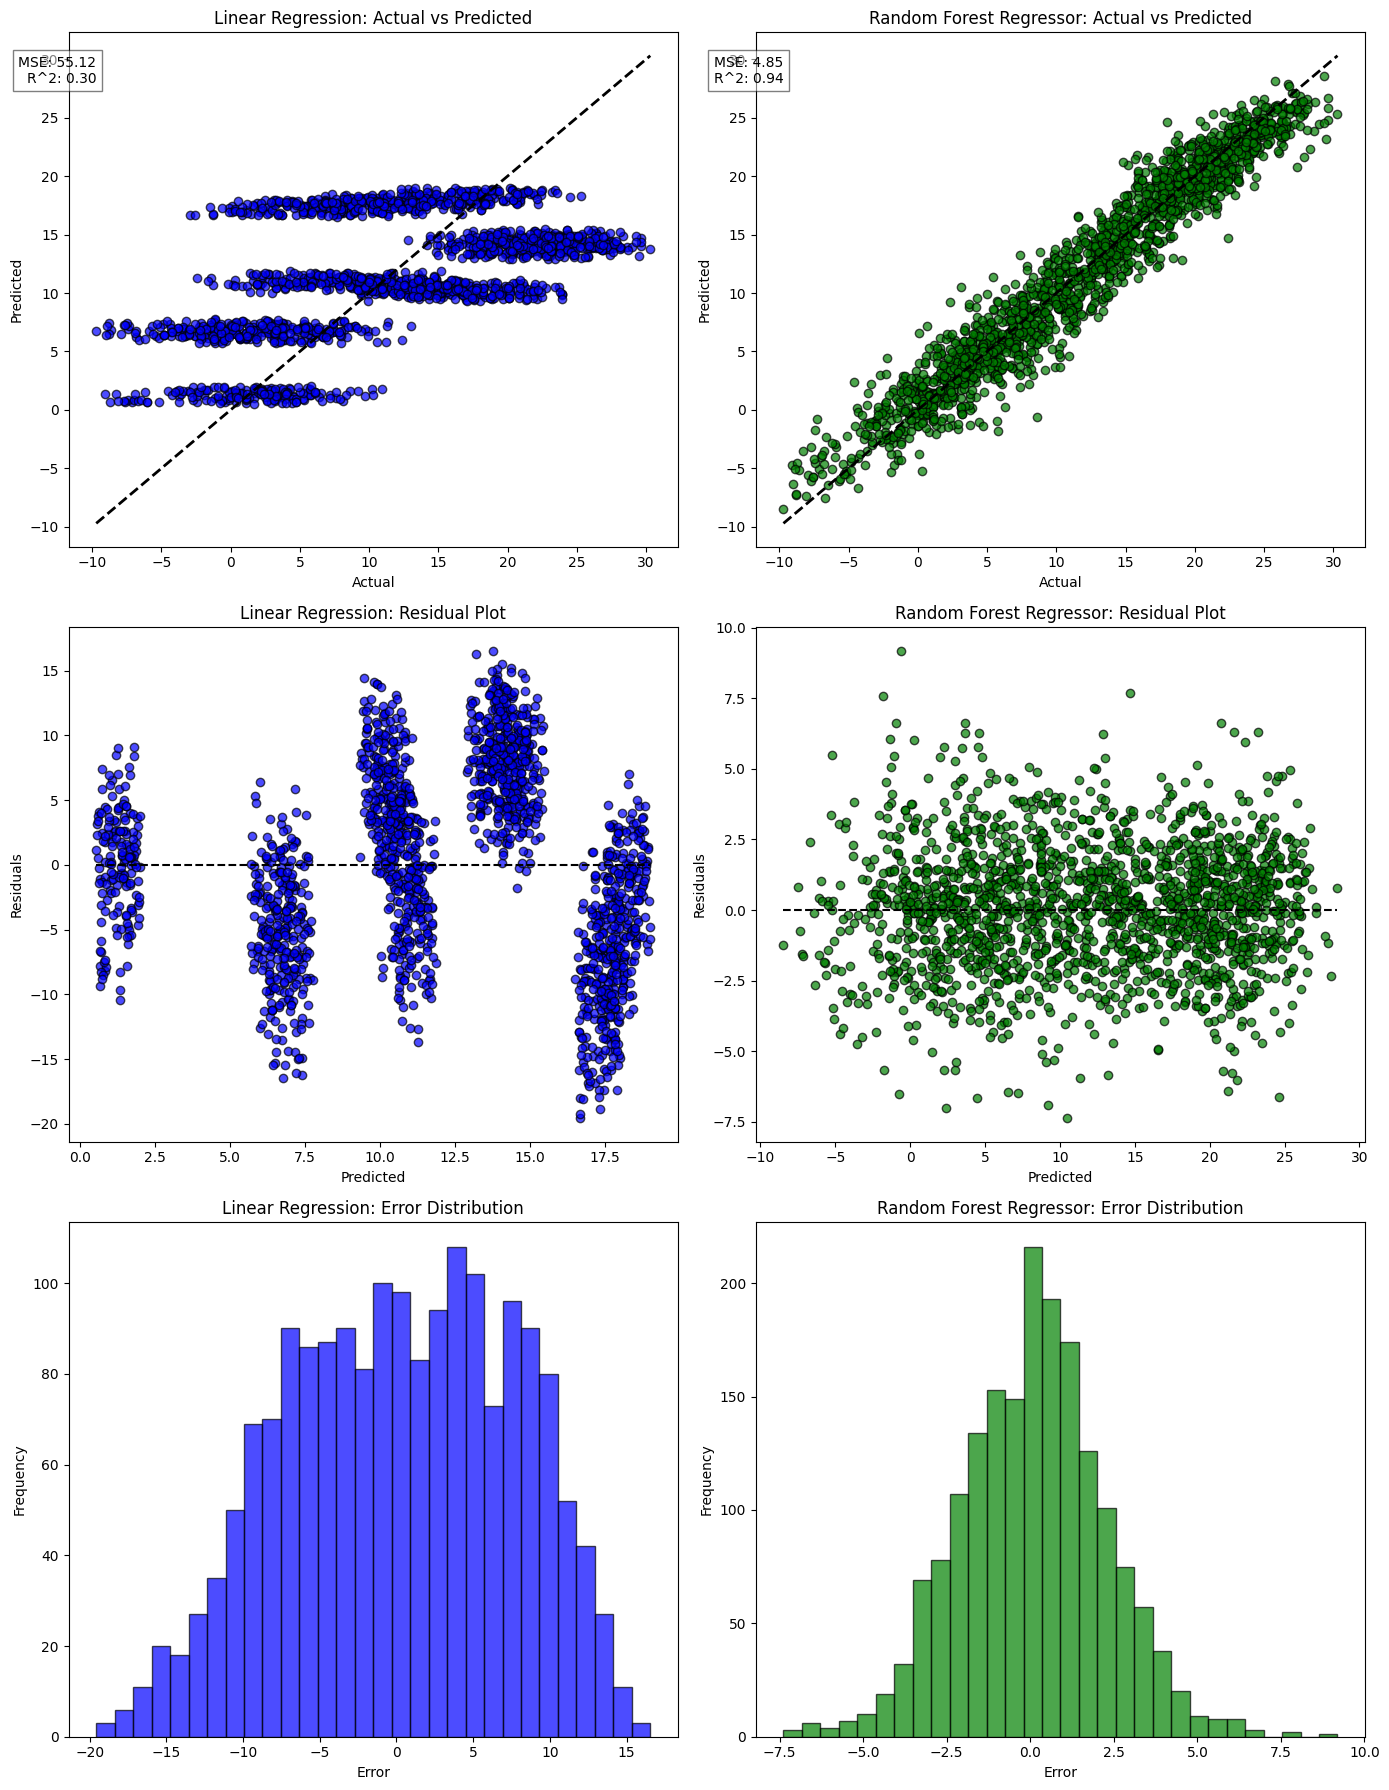

In [551]:
# Plotting
plt.figure(figsize=(14, 18))

# Scatter plot for Linear Regression
plt.subplot(3, 2, 1)
plt.scatter(y_test, y_pred_linear, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Actual vs Predicted')
plt.text(y_test.min(), y_test.max(), f'MSE: {mse_linear:.2f}\nR^2: {r2_linear:.2f}', 
         horizontalalignment='right', verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

# Scatter plot for Random Forest Regressor
plt.subplot(3, 2, 2)
plt.scatter(y_test, y_pred_Forest, color='green', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Regressor: Actual vs Predicted')
plt.text(y_test.min(), y_test.max(), f'MSE: {mse_Forest:.2f}\nR^2: {r2_Forest:.2f}', 
         horizontalalignment='right', verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

# Residual plot for Linear Regression
plt.subplot(3, 2, 3)
plt.scatter(y_pred_linear, y_test - y_pred_linear, color='blue', edgecolor='k', alpha=0.7)
plt.hlines(0, y_pred_linear.min(), y_pred_linear.max(), colors='k', linestyles='dashed')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Linear Regression: Residual Plot')

# Residual plot for Random Forest Regressor
plt.subplot(3, 2, 4)
plt.scatter(y_pred_Forest, y_test - y_pred_Forest, color='green', edgecolor='k', alpha=0.7)
plt.hlines(0, y_pred_Forest.min(), y_pred_Forest.max(), colors='k', linestyles='dashed')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Random Forest Regressor: Residual Plot')

# Distribution of errors for Linear Regression
plt.subplot(3, 2, 5)
plt.hist(y_test - y_pred_linear, bins=30, color='blue', edgecolor='k', alpha=0.7)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Linear Regression: Error Distribution')

# Distribution of errors for Random Forest Regressor
plt.subplot(3, 2, 6)
plt.hist(y_test - y_pred_Forest, bins=30, color='green', edgecolor='k', alpha=0.7)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Random Forest Regressor: Error Distribution')

plt.tight_layout()
plt.show()

Analyzing the plots you have provided, we can draw several conclusions about the performance of the LinearRegression and RandomForestRegressor models:
1. Scatter Plots (Actual vs Predicted)

    Linear Regression:
        The scatter plot shows a relatively poor fit, with predicted values not aligning well with the actual values.
        The predictions are somewhat grouped into distinct bands, suggesting that the model may not be capturing the relationship between the features and the target variable effectively.
        The R2R2 value is 0.30, indicating that only 30% of the variance in the target variable is explained by the model.
        The Mean Squared Error (MSE) is relatively high at 55.12.

    Random Forest Regressor:
        The scatter plot shows a much better fit, with predicted values closely aligning with the actual values.
        The points are more tightly clustered along the diagonal line (y = x), indicating better predictions.
        The R2R2 value is 0.94, which is much higher, indicating that 94% of the variance in the target variable is explained by the model.
        The MSE is much lower at 4.85.

2. Residual Plots

    Linear Regression:
        The residual plot shows a pattern, with residuals (errors) not being randomly distributed. This indicates that the model is not capturing all the underlying trends in the data.
        There are distinct bands of residuals, further indicating that the model might be too simple for the complexity of the data.

    Random Forest Regressor:
        The residuals are more randomly distributed around zero, which is a good sign.
        There is less structure in the residuals, indicating that the model is better at capturing the relationships in the data.
        The spread of residuals is smaller compared to the linear regression model, indicating more accurate predictions.

3. Error Distribution

    Linear Regression:
        The error distribution is fairly wide, with a noticeable spread. Errors range from approximately -15 to +15.
        The histogram shows a peak around zero but with significant spread, indicating less accurate predictions.

    Random Forest Regressor:
        The error distribution is much narrower, with most errors clustered around zero.
        Errors range from approximately -7.5 to +7.5, showing that the model's predictions are generally more accurate and less spread out compared to the linear regression model.

Summary

    Linear Regression: The model shows poor performance with low R2R2, high MSE, and non-random residuals. The error distribution is wide, indicating less accurate predictions.
    Random Forest Regressor: The model performs significantly better with high R2R2, low MSE, and random residuals. The error distribution is narrow, indicating more accurate predictions.

The Random Forest Regressor clearly outperforms the Linear Regression model in this case, providing more accurate and reliable predictions for the average temperature. This is likely due to the ability of Random Forest to capture non-linear relationships and interactions between features, which Linear Regression might miss.

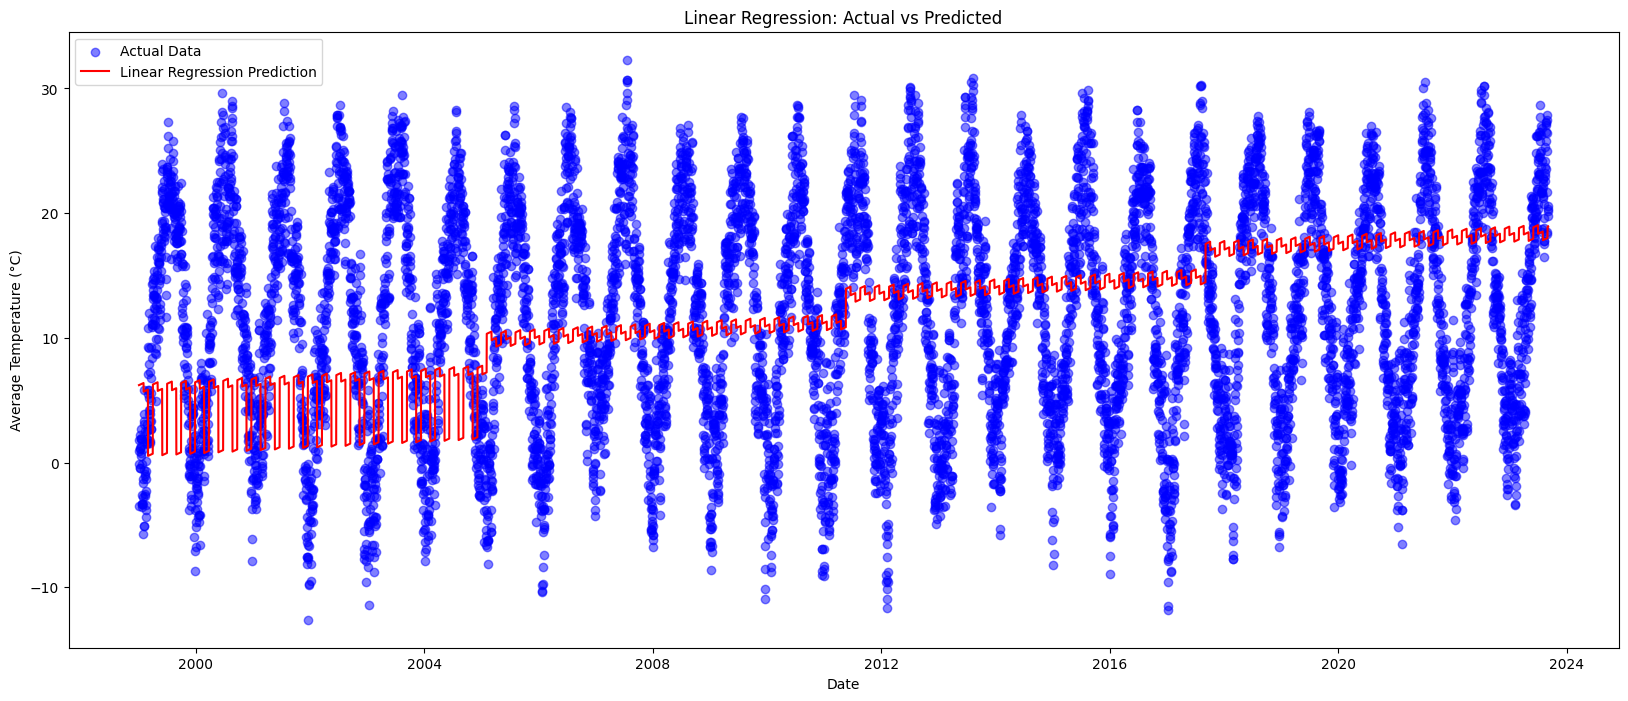

In [559]:
dfBP['Date'] = pd.to_datetime(dfBP[['year', 'month', 'day']])
dfBP['Predicted_Linear'] = model_linear.predict(x_temp)
# Plotting Linear Regression
plt.figure(figsize=(20, 8))
plt.scatter(dfBP['Date'], dfBP['avg_temp_c'], color='blue', label='Actual Data', alpha=0.5)
plt.plot(dfBP['Date'], dfBP['Predicted_Linear'], color='red', label='Linear Regression Prediction')
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.show()

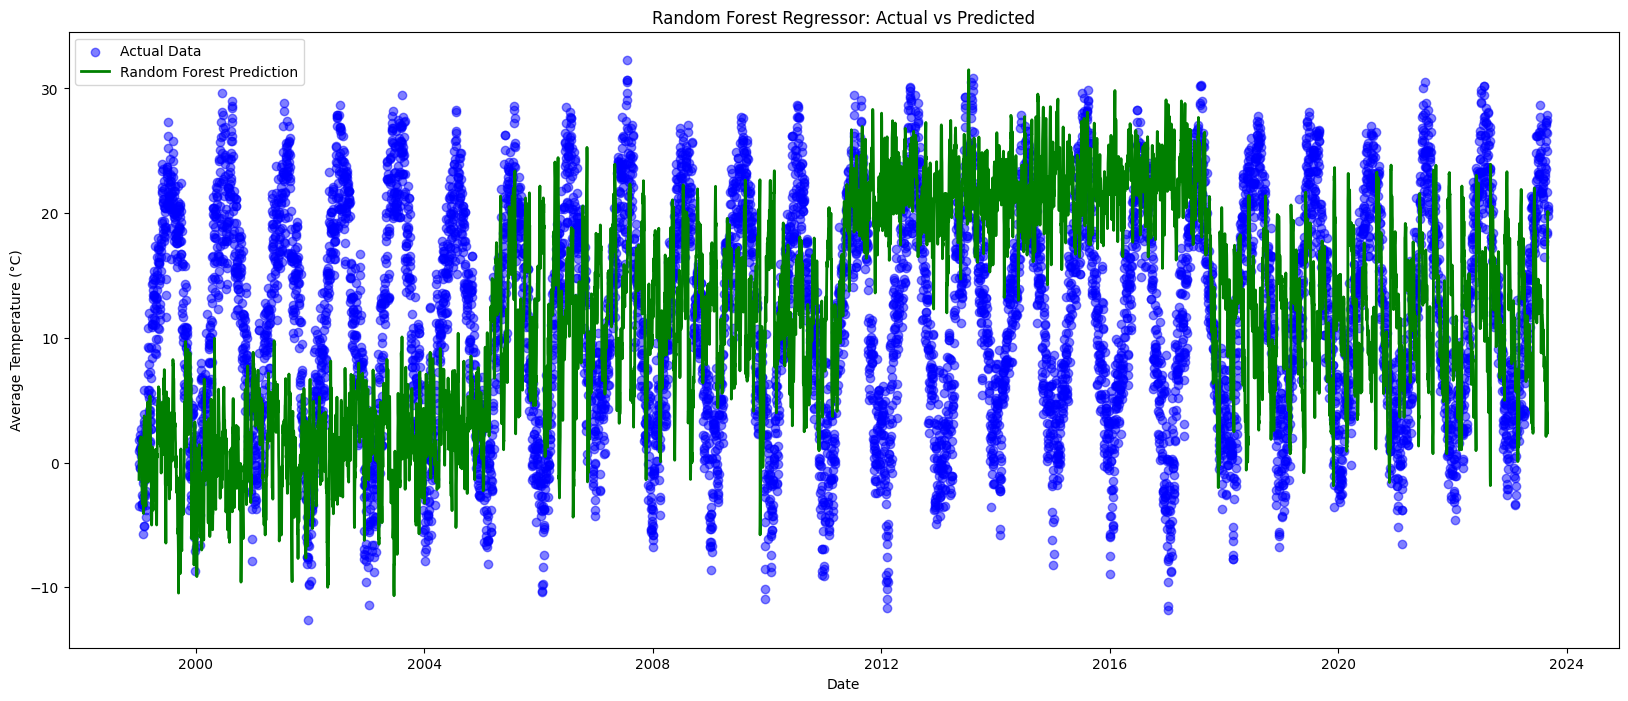

In [525]:
dfBP['Predicted_RF'] = model_forest.predict(x_temp)
# Plotting Random Forest Regressor
plt.figure(figsize=(20, 8))
plt.scatter(dfBP['Date'], dfBP['avg_temp_c'], color='blue', label='Actual Data', alpha=0.5)
plt.plot(dfBP['Date'], dfBP['Predicted_RF'], color='green', label='Random Forest Prediction', linewidth=2)
plt.title('Random Forest Regressor: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.show()